In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns



In [3]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv('/Users/angelis/Downloads/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

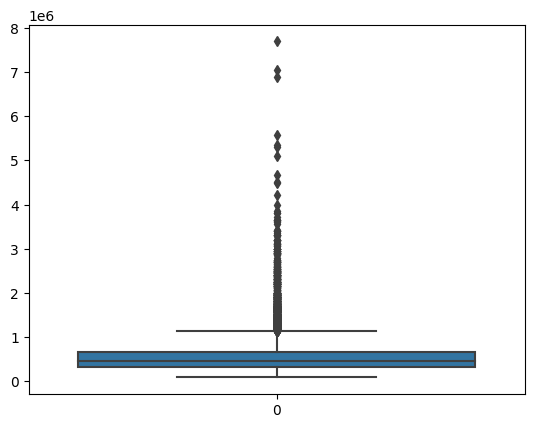

In [8]:
sns.boxplot(df.price)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

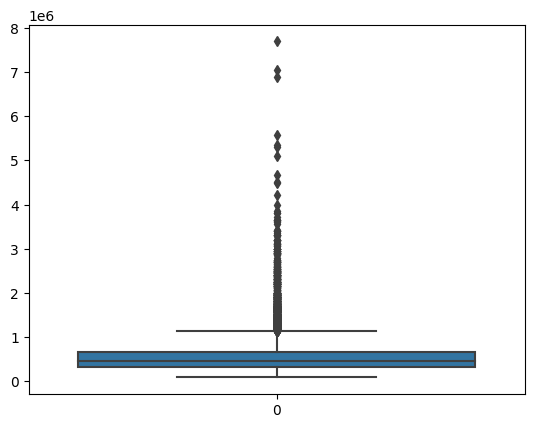

In [10]:
sns.boxplot(df.price)

<Axes: >

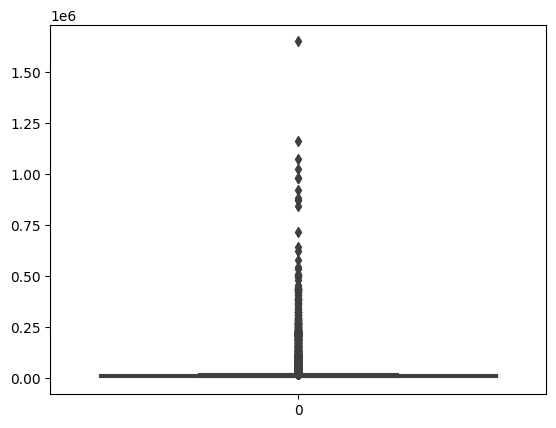

In [11]:
sns.boxplot(df.sqft_lot)

In [12]:
df = df.drop(df[df['sqft_lot'] > 60000].index)

<Axes: >

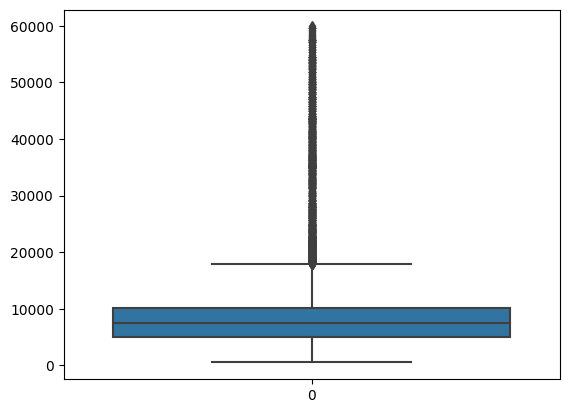

In [13]:
sns.boxplot(df.sqft_lot)

<Axes: >

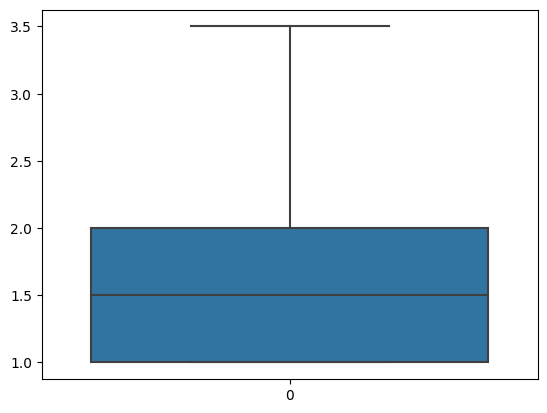

In [14]:
sns.boxplot(df.floors)

<Axes: >

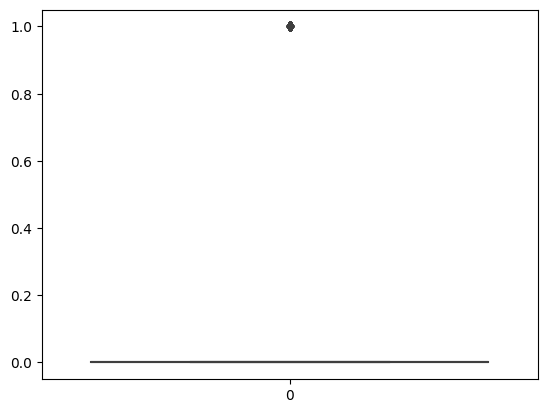

In [15]:
sns.boxplot(df.waterfront)

<Axes: >

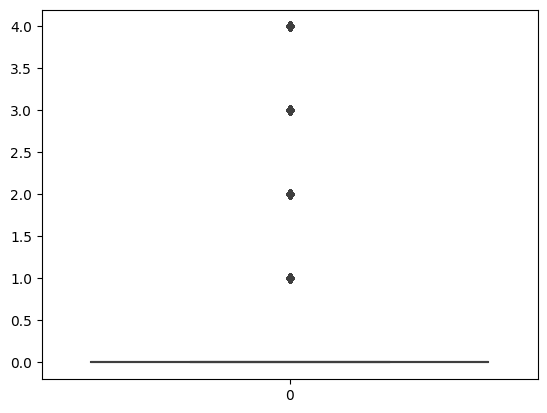

In [16]:
sns.boxplot(df.view)

<Axes: >

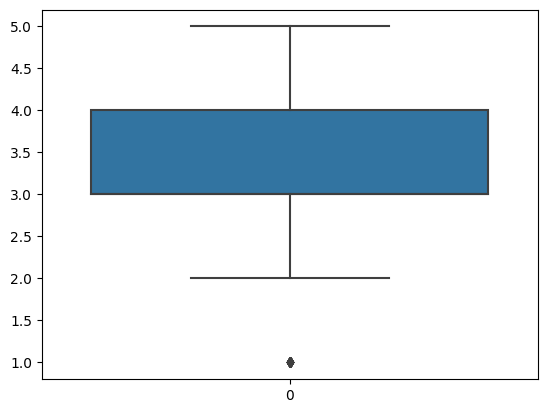

In [17]:
sns.boxplot(df.condition)

<Axes: >

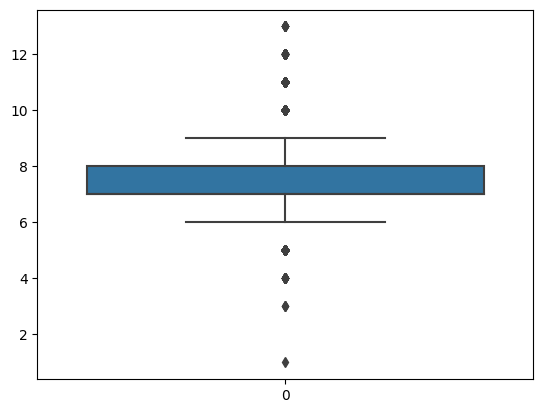

In [18]:
sns.boxplot(df.grade)

<Axes: >

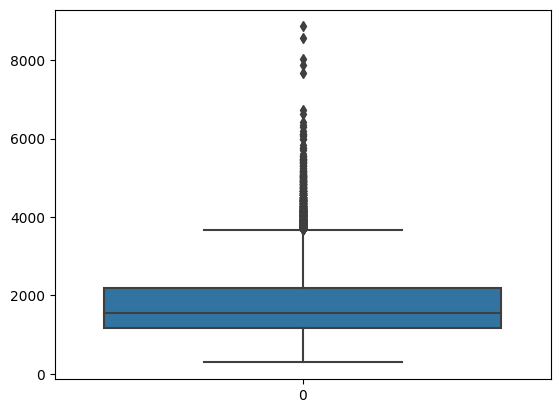

In [19]:
sns.boxplot(df.sqft_above)

<Axes: >

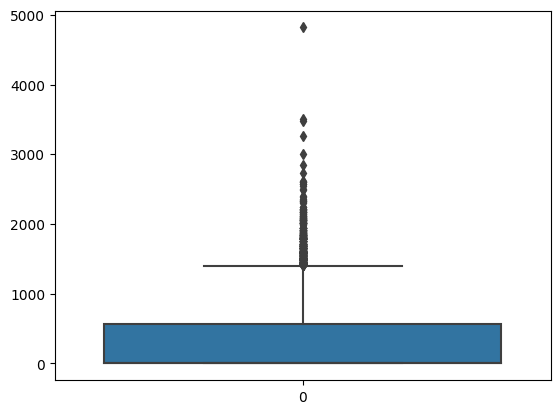

In [20]:
sns.boxplot(df.sqft_basement)

<Axes: >

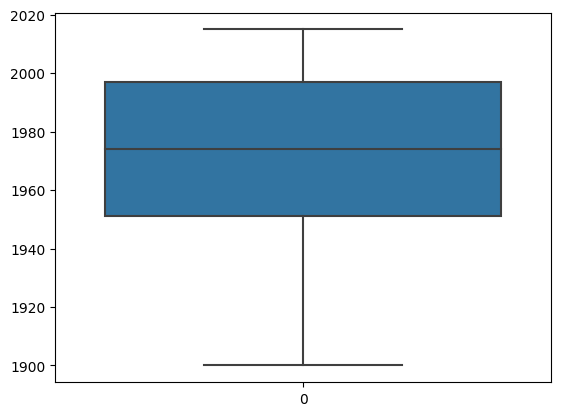

In [21]:
sns.boxplot(df.yr_built)

<Axes: >

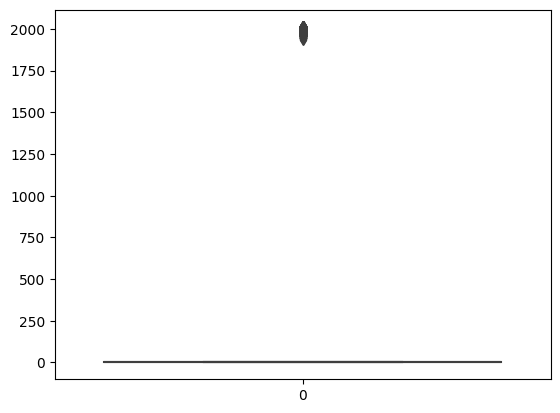

In [22]:
sns.boxplot(df.yr_renovated)

<Axes: >

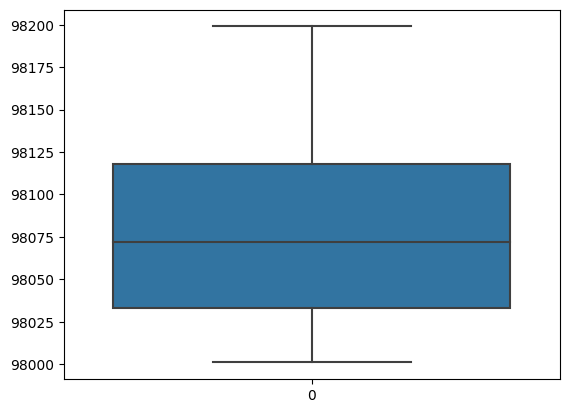

In [23]:
sns.boxplot(df.zipcode)

<Axes: >

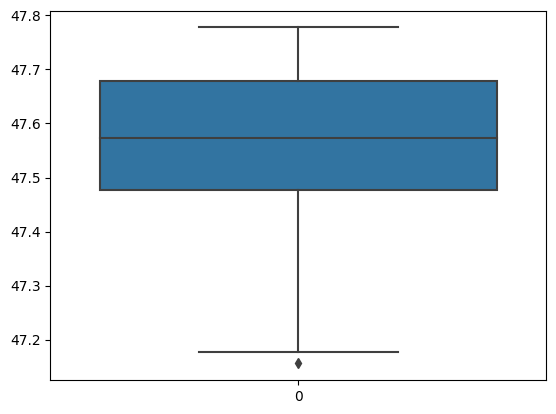

In [24]:
sns.boxplot(df.lat)

<Axes: >

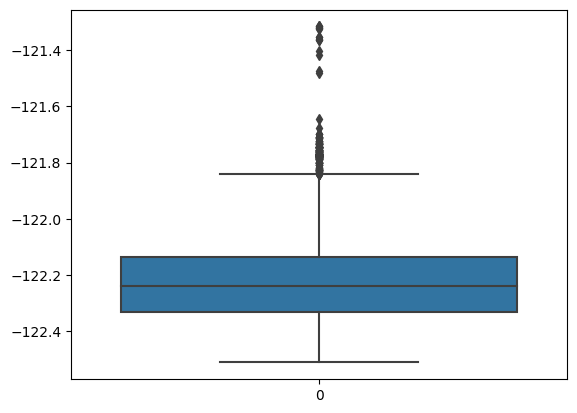

In [25]:
sns.boxplot(df.long)

<Axes: >

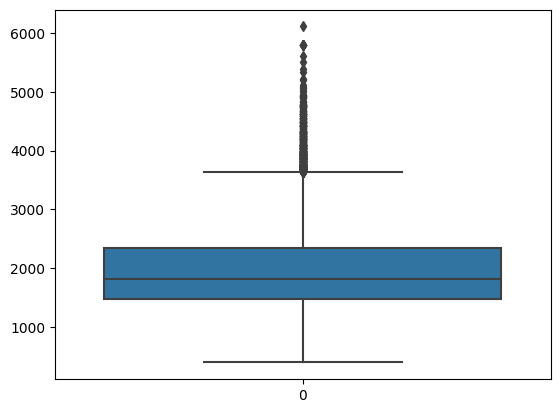

In [26]:
sns.boxplot(df.sqft_living15)

<Axes: >

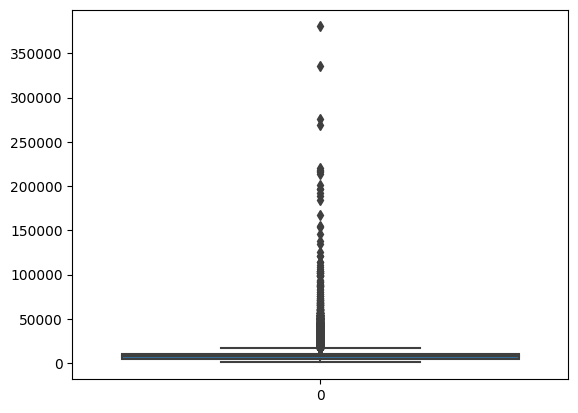

In [27]:
sns.boxplot(df.sqft_lot15)

In [28]:
df = df.drop(df[df['sqft_lot15'] > 150000].index)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20877 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20877 non-null  int64  
 1   date           20877 non-null  object 
 2   price          20877 non-null  float64
 3   bedrooms       20877 non-null  int64  
 4   bathrooms      20877 non-null  float64
 5   sqft_living    20877 non-null  int64  
 6   sqft_lot       20877 non-null  int64  
 7   floors         20877 non-null  float64
 8   waterfront     20877 non-null  int64  
 9   view           20877 non-null  int64  
 10  condition      20877 non-null  int64  
 11  grade          20877 non-null  int64  
 12  sqft_above     20877 non-null  int64  
 13  sqft_basement  20877 non-null  int64  
 14  yr_built       20877 non-null  int64  
 15  yr_renovated   20877 non-null  int64  
 16  zipcode        20877 non-null  int64  
 17  lat            20877 non-null  float64
 18  long       

In [30]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [31]:
dummies_view = pd.get_dummies(df.view, dtype=int)

In [32]:
dummies_view.rename(columns = {1:'view_0', 2:'view_1', 3:'view_2', 4:'view_3', 5:'view_4'}, inplace = True)

In [33]:
df = pd.concat([df,dummies_view], axis=1)

In [34]:
dummies_condition = pd.get_dummies(df.condition, dtype=int)

In [35]:
dummies_condition.rename(columns = {1:'condition_1', 2:'condition_2', 3:'condition_3', 4:'condition_4', 5:'condition_5'}, inplace = True)

In [36]:
df = pd.concat([df,dummies_condition], axis=1)

In [37]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,0,view_0,view_1,view_2,view_3,condition_1,condition_2,condition_3,condition_4,condition_5
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [38]:
# Transform datetime to a datetime data format
df['date'] = pd.to_datetime(df['date'])

In [39]:
df['year'] = df['date'].dt.year

In [40]:
df['month'] = df['date'].dt.month

In [41]:
df['day'] = df['date'].dt.day

In [42]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,view_2,view_3,condition_1,condition_2,condition_3,condition_4,condition_5,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,1,0,0,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,1,0,0,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,1,0,0,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,1,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,1,0,0,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,1,0,0,2014,5,21
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,0,0,0,1,0,0,2015,2,23
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,1,0,0,2014,6,23
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,1,0,0,2015,1,16


In [43]:
results = ols("price ~  bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition +grade +sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + view_0 + view_1 + view_2 + view_3 + condition_1 + condition_2 + condition_3 + condition_4 + condition_5 ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2149.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:53:17   Log-Likelihood:            -2.8441e+05
No. Observations:               20877   AIC:                         5.689e+05
Df Residuals:                   20853   BIC:                         5.691e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.466e+06   1.47e+06      3.709

In [44]:
pred_vals = results.predict(df[['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot', 'floors' , 'waterfront' , 'view' , 'condition', 'grade' ,'sqft_above' , 'sqft_basement' , 'yr_built' , 'yr_renovated' , 'zipcode' , 'lat' , 'long' , 'sqft_living15' , 'sqft_lot15' , 'view_0' , 'view_1' , 'view_2' , 'view_3' , 'condition_1' , 'condition_2' , 'condition_3','condition_4','condition_5']])

In [45]:
pred_vals

0        208536.387092
1        740792.634591
2        370327.932851
3        462398.930077
4        445914.223322
             ...      
21608    479010.861773
21609    437647.384683
21610    143131.426656
21611    392909.400843
21612    146466.229388
Length: 20877, dtype: float64

In [46]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [47]:
res

,y_hat,price
0,208536.387092,221900.0
1,740792.634591,538000.0
2,370327.932851,180000.0
3,462398.930077,604000.0
4,445914.223322,510000.0
...,...,...
21608,479010.861773,360000.0
21609,437647.384683,400000.0
21610,143131.426656,402101.0
21611,392909.400843,400000.0


In [48]:
res['error'] = res['y_hat'] - res['price']

In [49]:
res.head(1)

,y_hat,price,error
0,208536.387092,221900.0,-13363.612908


In [50]:
res['sq_error'] = res['error']**2

In [51]:
np.sqrt(res['sq_error'].mean())

199653.21652625254

((array([-3.98882335, -3.77318088, -3.65520468, ...,  3.65520468,
          3.77318088,  3.98882335]),
  array([-4280089.97573546, -3944802.25459613, -3903270.08862635, ...,
          1054892.47005548,  1072339.76100154,  1250211.62568554])),
 (178317.6246015069, 6.331311435879193e-07, 0.8929726812267553))

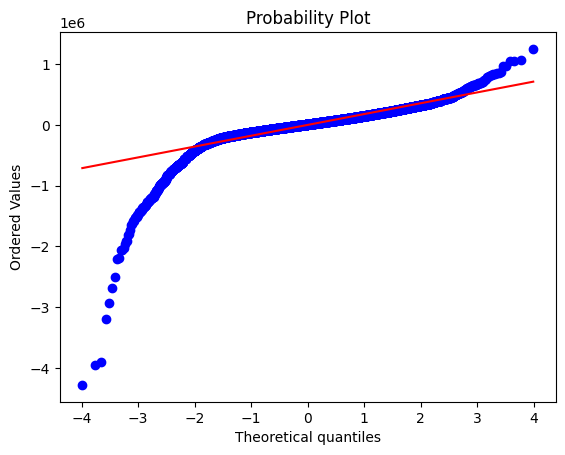

In [66]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20877 entries, 0 to 21612
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20877 non-null  int64         
 1   date           20877 non-null  datetime64[ns]
 2   price          20877 non-null  float64       
 3   bedrooms       20877 non-null  int64         
 4   bathrooms      20877 non-null  float64       
 5   sqft_living    20877 non-null  int64         
 6   sqft_lot       20877 non-null  int64         
 7   floors         20877 non-null  float64       
 8   waterfront     20877 non-null  int64         
 9   view           20877 non-null  int64         
 10  condition      20877 non-null  int64         
 11  grade          20877 non-null  int64         
 12  sqft_above     20877 non-null  int64         
 13  sqft_basement  20877 non-null  int64         
 14  yr_built       20877 non-null  int64         
 15  yr_renovated   20877 non

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [54]:
# separate features and target
categorical_features = ['waterfront','view', 'condition','grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living','sqft_lot','sqft_above','sqft_basement']
target = 'price'

In [55]:
df[['waterfront','view', 'condition','grade','bedrooms','bathrooms', 'sqft_living','sqft_lot','sqft_above','sqft_basement']]

,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,0,0,3,7,3,1.00,1180,5650,1180,0
1,0,0,3,7,3,2.25,2570,7242,2170,400
2,0,0,3,6,2,1.00,770,10000,770,0
3,0,0,5,7,4,3.00,1960,5000,1050,910
4,0,0,3,8,3,2.00,1680,8080,1680,0
...,...,...,...,...,...,...,...,...,...,...
21608,0,0,3,8,3,2.50,1530,1131,1530,0
21609,0,0,3,8,4,2.50,2310,5813,2310,0
21610,0,0,3,7,2,0.75,1020,1350,1020,0
21611,0,0,3,8,3,2.50,1600,2388,1600,0


In [56]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [57]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [58]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [59]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [60]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement'])])),
                ('regressor', LinearRegression())])

In [61]:
pred = linear_regression.predict(X_test)

In [62]:
pred

array([ 339200.,  375296., 1878016., ...,  311296.,  272384.,  411648.])

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
np.sqrt(mean_squared_error(pred,y_test))

231832.38733414494